In [1]:
import pandas as pd
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning, message=".*pyarrow.*")
import numpy as np
import matplotlib.pyplot as plt
%pip install seaborn

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split, cross_val_score, KFold, cross_validate
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.metrics import confusion_matrix


<ipython-input-1-954467f6efdf>:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [2]:
import seaborn as sns

In [3]:
df0 = pd.read_csv('WA_Fn-UseC_-HR-Employee-Attrition.csv')
df0.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [4]:
df0.shape

(1470, 35)

In [5]:
df0.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

In [6]:
object_columns = df0.select_dtypes(include=['object'])
print(object_columns.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Attrition       1470 non-null   object
 1   BusinessTravel  1470 non-null   object
 2   Department      1470 non-null   object
 3   EducationField  1470 non-null   object
 4   Gender          1470 non-null   object
 5   JobRole         1470 non-null   object
 6   MaritalStatus   1470 non-null   object
 7   Over18          1470 non-null   object
 8   OverTime        1470 non-null   object
dtypes: object(9)
memory usage: 51.8+ KB
None


In [7]:
column_list = df0.columns.tolist()
print(column_list)

['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department', 'DistanceFromHome', 'Education', 'EducationField', 'EmployeeCount', 'EmployeeNumber', 'EnvironmentSatisfaction', 'Gender', 'HourlyRate', 'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction', 'MaritalStatus', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked', 'Over18', 'OverTime', 'PercentSalaryHike', 'PerformanceRating', 'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion', 'YearsWithCurrManager']


Age	Attrition	BusinessTravel	DailyRate	Department	DistanceFromHome	Education	EducationField	EmployeeCount
EmployeeNumber	EnvironmentSatisfaction	Gender	HourlyRate	JobInvolvement	JobLevel	JobRole	JobSatisfaction	MaritalStatus
MonthlyIncome	MonthlyRate	NumCompaniesWorked	Over18	OverTime	PercentSalaryHike	PerformanceRating	RelationshipSatisfaction
StandardHours	StockOptionLevel	TotalWorkingYears	TrainingTimesLastYear	WorkLifeBalance	YearsAtCompany	YearsInCurrentRole
YearsSinceLastPromotion	YearsWithCurrManager

In [8]:
df0.duplicated().sum()

0

In [9]:
has_null = df0.isnull().values.any()

print(has_null)

False


In [10]:
df0.describe()

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,...,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,802.485714,9.192517,2.912925,1.0,1024.865306,2.721769,65.891156,2.729932,2.063946,...,2.712245,80.0,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.135373,403.509100,8.106864,1.024165,0.0,602.024335,1.093082,20.329428,0.711561,1.106940,...,1.081209,0.0,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,18.000000,102.000000,1.000000,1.000000,1.0,1.000000,1.000000,30.000000,1.000000,1.000000,...,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,465.000000,2.000000,2.000000,1.0,491.250000,2.000000,48.000000,2.000000,1.000000,...,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,802.000000,7.000000,3.000000,1.0,1020.500000,3.000000,66.000000,3.000000,2.000000,...,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,1157.000000,14.000000,4.000000,1.0,1555.750000,4.000000,83.750000,3.000000,3.000000,...,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1499.000000,29.000000,5.000000,1.0,2068.000000,4.000000,100.000000,4.000000,5.000000,...,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


In [11]:
##NUMBER OF DISTINCT VALUES FOR EACH COLUMN
for column in df0.columns:
    num_distinct_values = len(df0[column].unique())
    print(f"{column}: {num_distinct_values} distinct values")

Age: 43 distinct values
Attrition: 2 distinct values
BusinessTravel: 3 distinct values
DailyRate: 886 distinct values
Department: 3 distinct values
DistanceFromHome: 29 distinct values
Education: 5 distinct values
EducationField: 6 distinct values
EmployeeCount: 1 distinct values
EmployeeNumber: 1470 distinct values
EnvironmentSatisfaction: 4 distinct values
Gender: 2 distinct values
HourlyRate: 71 distinct values
JobInvolvement: 4 distinct values
JobLevel: 5 distinct values
JobRole: 9 distinct values
JobSatisfaction: 4 distinct values
MaritalStatus: 3 distinct values
MonthlyIncome: 1349 distinct values
MonthlyRate: 1427 distinct values
NumCompaniesWorked: 10 distinct values
Over18: 1 distinct values
OverTime: 2 distinct values
PercentSalaryHike: 15 distinct values
PerformanceRating: 2 distinct values
RelationshipSatisfaction: 4 distinct values
StandardHours: 1 distinct values
StockOptionLevel: 4 distinct values
TotalWorkingYears: 40 distinct values
TrainingTimesLastYear: 7 distinct va

In [12]:
count_att_yes = df0[(df0['Attrition'] == 'Yes')]
count_att_no = df0[(df0['Attrition'] == 'No')]
count_att_yes.shape


(237, 35)

In [13]:
count_att_no.shape

(1233, 35)

                                                    PERSONAL DEMOGRAPHIC

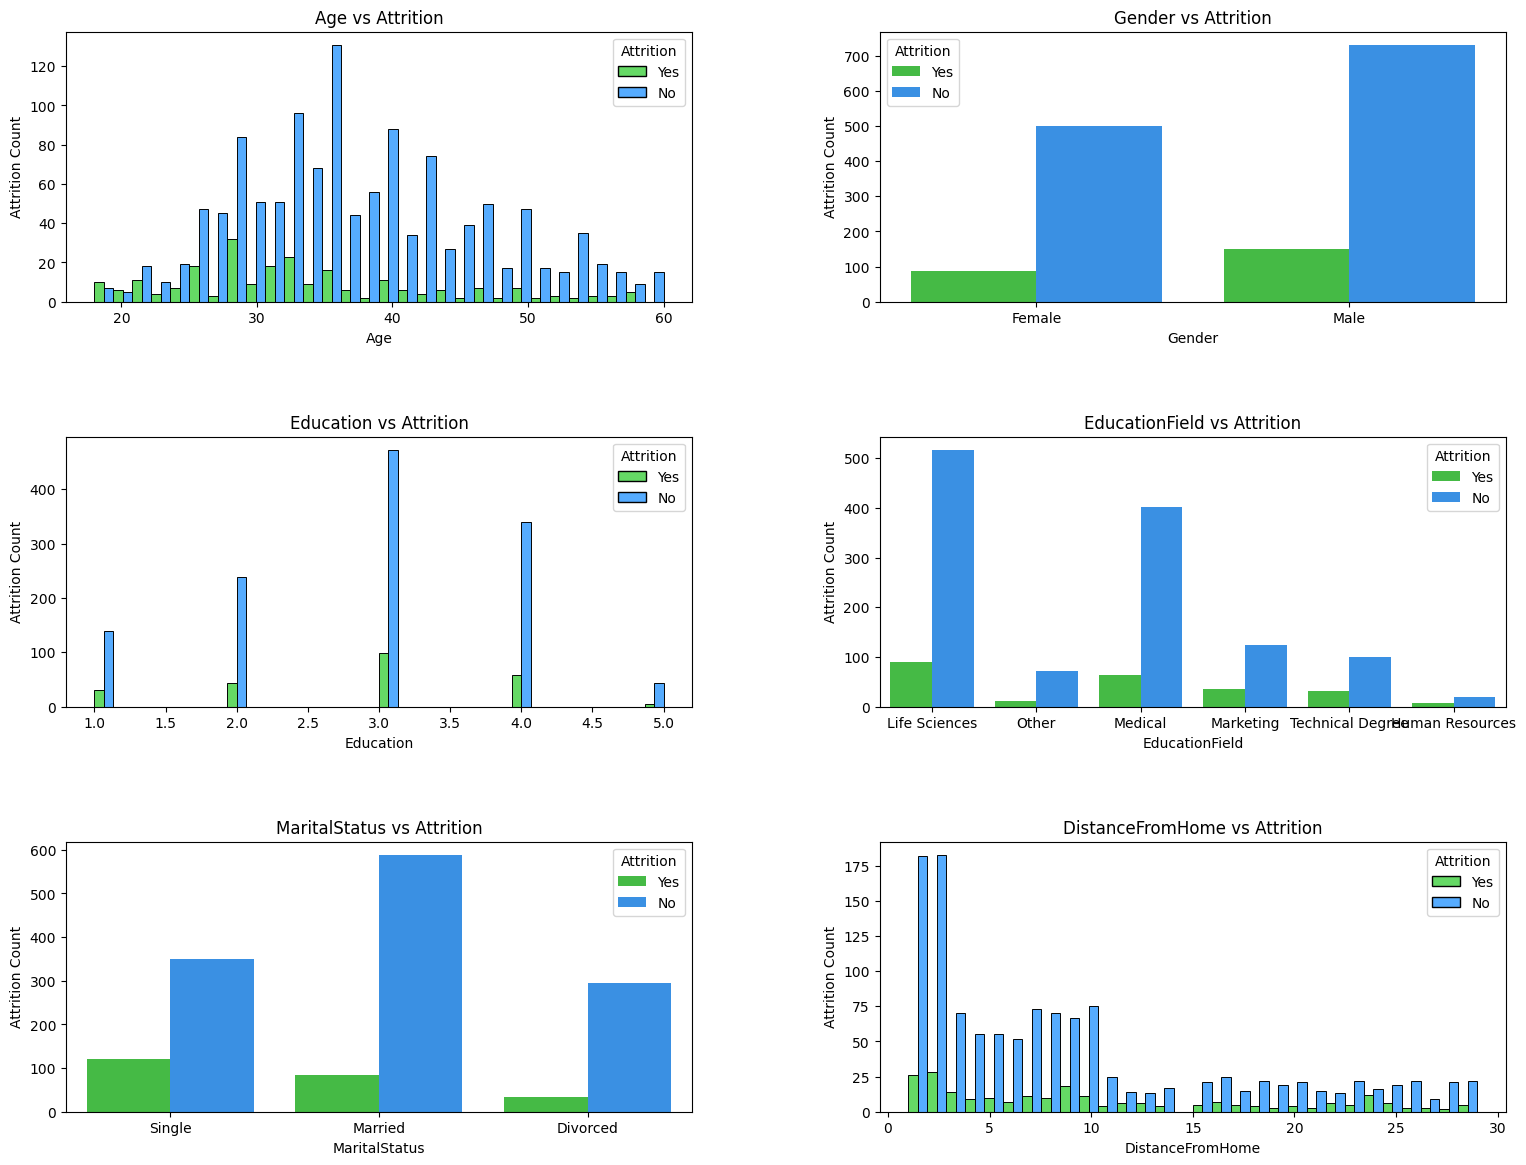

In [14]:

# Personal Demographic columns of employees to plot against 'Attrition'
# List of columns to plot against 'Attrition'
columns = ['Age', 'Gender', 'Education', 'EducationField', 'MaritalStatus', 'DistanceFromHome']

# Calculate the number of rows needed
num_cols = 2
num_rows = len(columns) // num_cols + (len(columns) % num_cols > 0)

# Create subplots with a larger figure size
fig, axes = plt.subplots(num_rows, num_cols, figsize=(18, 12))

# Flatten axes for easy iteration if it's 2D
axes = axes.flatten()

# Loop through each column and create the plot
for i, col in enumerate(columns):
    if df0[col].dtype == 'object':  # For categorical columns
        sns.countplot(data=df0, x=col, hue='Attrition', palette={'Yes': 'limegreen', 'No': 'dodgerblue'}, ax=axes[i])
        axes[i].set_title(f'{col} vs Attrition', ha='center')
        axes[i].set_xlabel(col)
        axes[i].set_ylabel('Attrition Count')
    else:  # For numeric columns (like 'Age' and 'DistanceFromHome')
        sns.histplot(data=df0, x=col, hue='Attrition', bins=30, multiple='dodge', 
                     palette={'Yes': 'limegreen', 'No': 'dodgerblue'}, edgecolor='black', ax=axes[i])
        axes[i].set_title(f'{col} vs Attrition', ha='center')
        axes[i].set_xlabel(col)
        axes[i].set_ylabel('Attrition Count')

# Remove any empty subplots
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

# Adjust the layout to prevent overlap and add more vertical spacing
plt.tight_layout()
plt.subplots_adjust(top=0.95, bottom=0.05, left=0.1, right=0.9, hspace=0.5, wspace=0.3)

# Show the plot
plt.show()




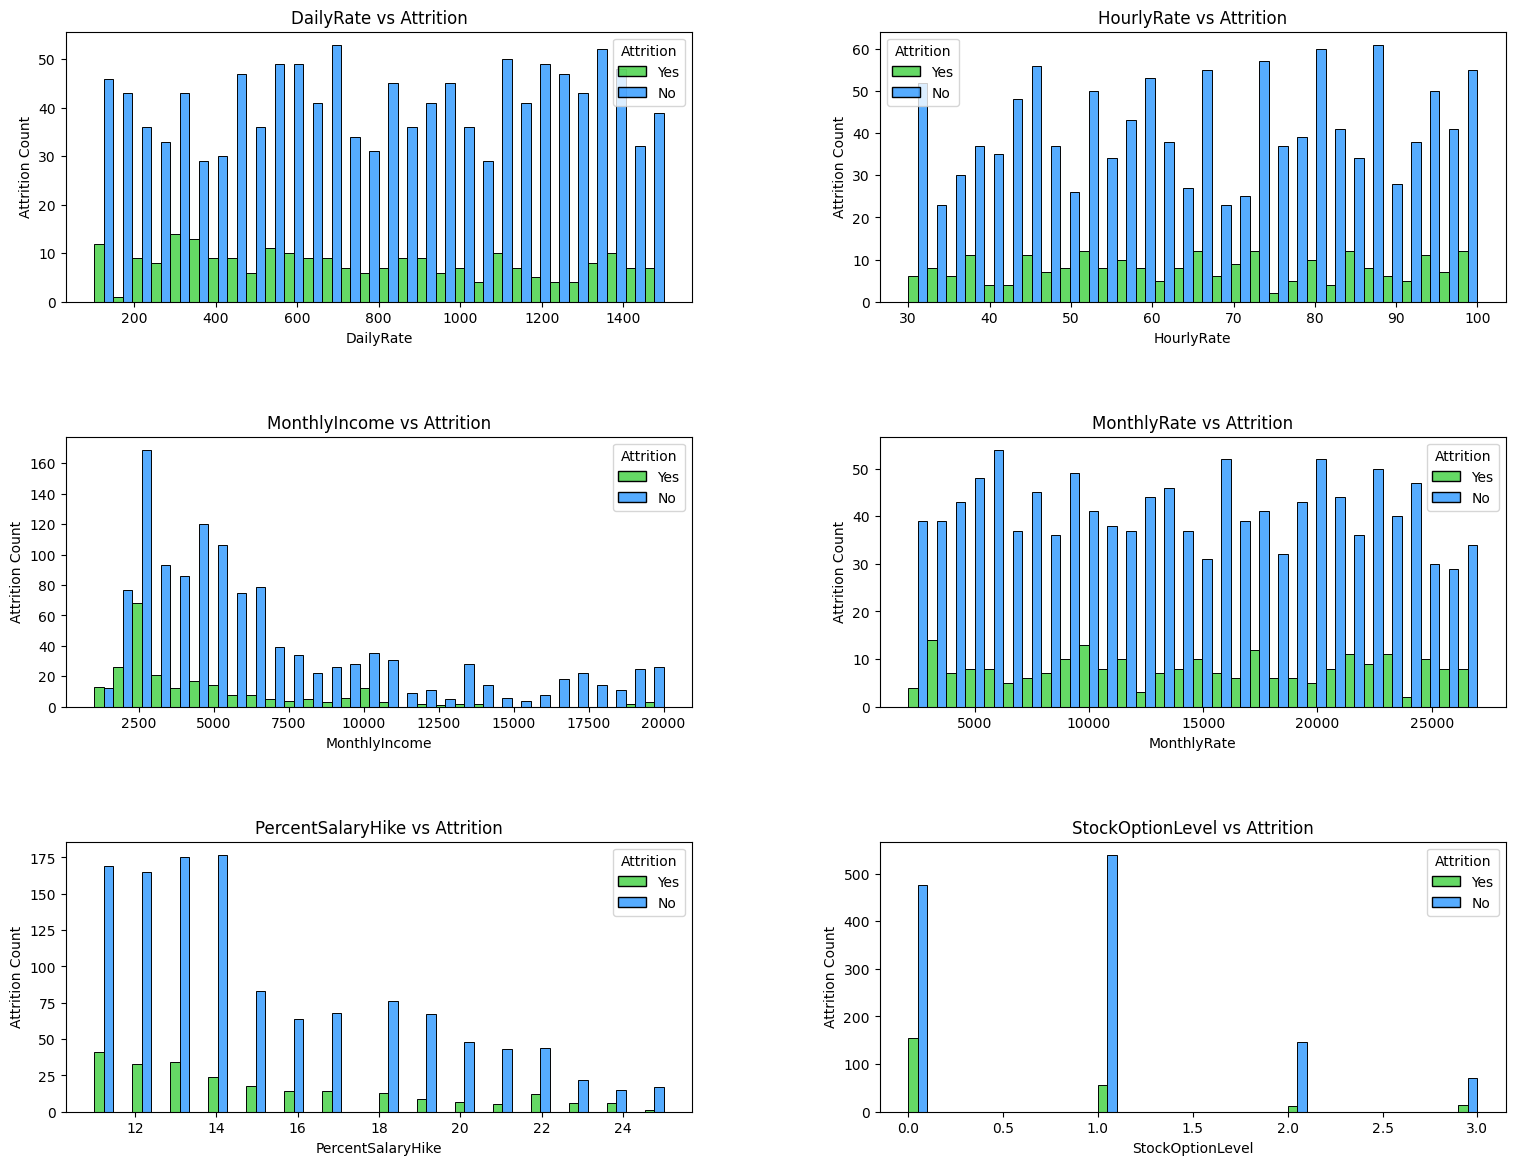

In [15]:

# List of columns to plot against 'Attrition'
columns = ['DailyRate', 'HourlyRate', 'MonthlyIncome', 'MonthlyRate', 'PercentSalaryHike', 'StockOptionLevel']

# Calculate the number of rows needed
num_cols = 2
num_rows = len(columns) // num_cols + (len(columns) % num_cols > 0)

# Create subplots with a larger figure size
fig, axes = plt.subplots(num_rows, num_cols, figsize=(18, 12))

# Flatten axes for easy iteration if it's 2D
axes = axes.flatten()

# Loop through each column and create the histogram
for i, col in enumerate(columns):
    sns.histplot(data=df0, x=col, hue='Attrition', bins=30, multiple='dodge', 
                 palette={'Yes': 'limegreen', 'No': 'dodgerblue'}, edgecolor='black', ax=axes[i])
    axes[i].set_title(f'{col} vs Attrition', ha='center')
    axes[i].set_xlabel(col)
    axes[i].set_ylabel('Attrition Count')

# Remove any empty subplots
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

# Adjust the layout to prevent overlap
plt.tight_layout()
plt.subplots_adjust(top=0.95, bottom=0.05, left=0.1, right=0.9, hspace=0.5, wspace=0.3)
plt.show()

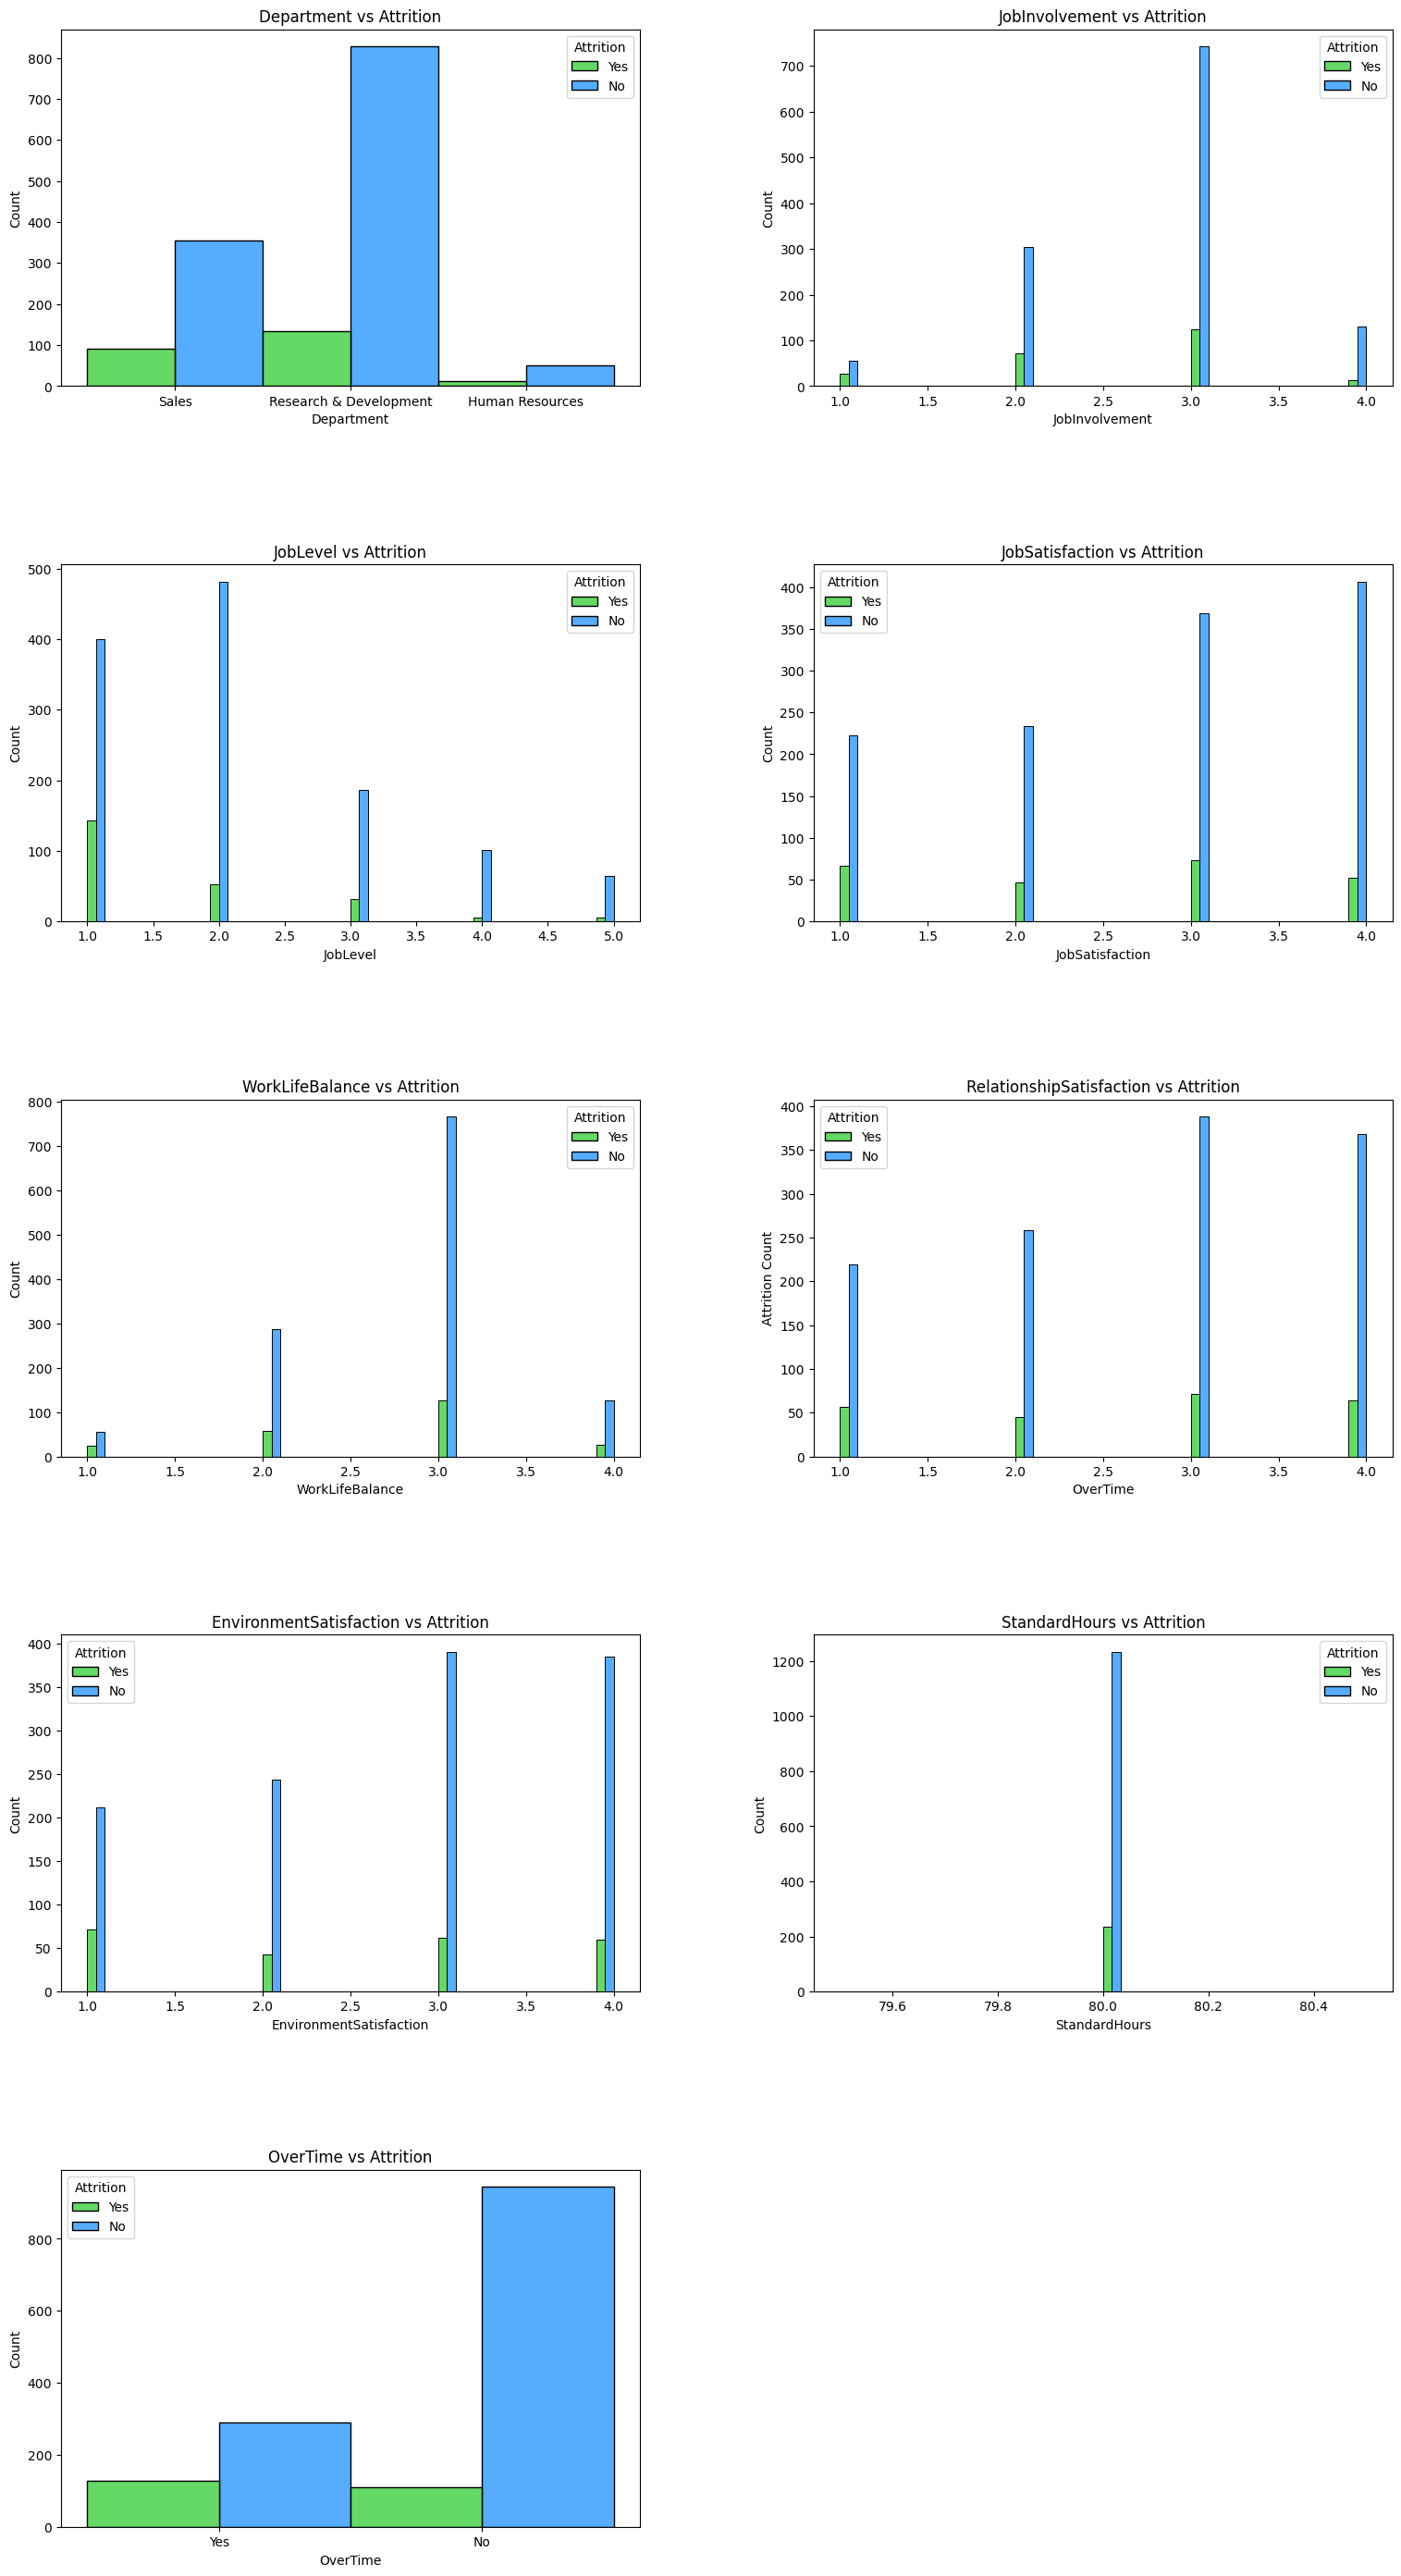

In [16]:
# List of columns to plot against 'Attrition', excluding 'JobRole'
personal_XP = ['Department', 'JobInvolvement', 'JobLevel', 'JobSatisfaction', 'WorkLifeBalance', 
               'RelationshipSatisfaction', 'EnvironmentSatisfaction', 'StandardHours', 'OverTime']

# Determine how many charts need two per row
num_regular_cols = len(personal_XP)
num_rows = num_regular_cols // 2 + num_regular_cols % 2  # Rows for regular columns

# Create subplots for regular columns
fig, axes = plt.subplots(num_rows, 2, figsize=(18, 6 * num_rows))

# Flatten axes for easy iteration
axes = axes.flatten()

# Loop through each column and create the histograms
for plot_index, col in enumerate(personal_XP):
    sns.histplot(data=df0, x=col, hue='Attrition', bins=30, multiple='dodge', 
                 palette={'Yes': 'limegreen', 'No': 'dodgerblue'}, edgecolor='black', ax=axes[plot_index])
    axes[plot_index].set_title(f'{col} vs Attrition', ha='center')
    axes[i].set_xlabel(col)
    axes[i].set_ylabel('Attrition Count')

# Remove any unused subplots if the number of regular columns is odd
if num_regular_cols % 2 != 0:
    fig.delaxes(axes[-1])

plt.tight_layout()
plt.subplots_adjust(top=0.95, bottom=0.05, left=0.1, right=0.9, hspace=0.5, wspace=0.3)
plt.show()


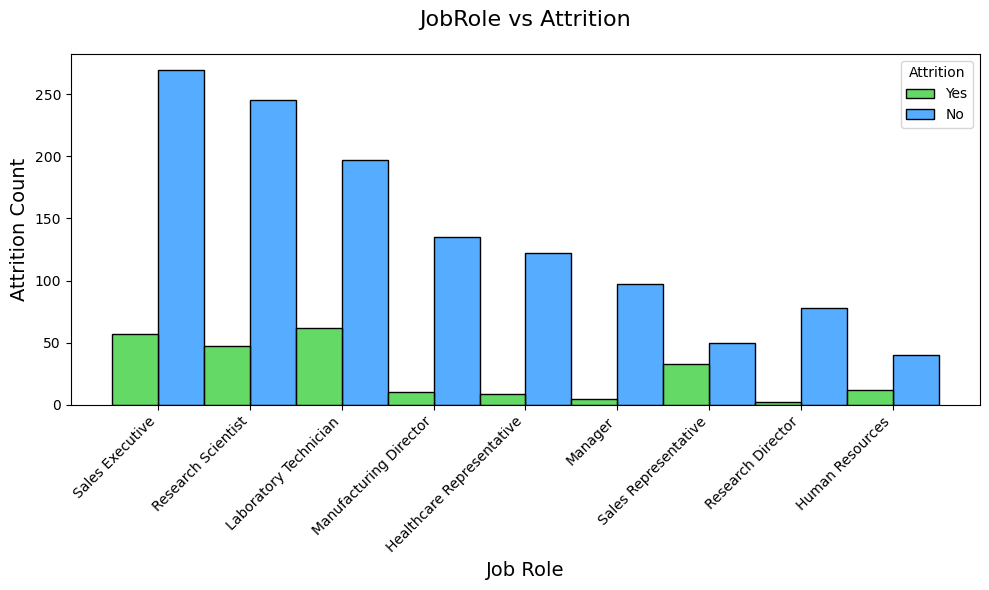

In [17]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.histplot(data=df0, x='JobRole', hue='Attrition', bins=30, multiple='dodge', 
             palette={'Yes': 'limegreen', 'No': 'dodgerblue'}, edgecolor='black')

# Set title and labels with appropriate font sizes
plt.title('JobRole vs Attrition', fontsize=16, ha='center', pad=20)
plt.xlabel('Job Role', fontsize=14)
plt.ylabel('Attrition Count', fontsize=14)

# Rotate x-axis labels and adjust alignment for clarity
plt.xticks(rotation=45, ha='right')

plt.tight_layout()
plt.show()


## 'Department', 'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction', 'WorkLifeBalance', 'RelationshipSatisfaction', 'EnvironmentSatisfaction', 'StandardHours', 'OverTime'

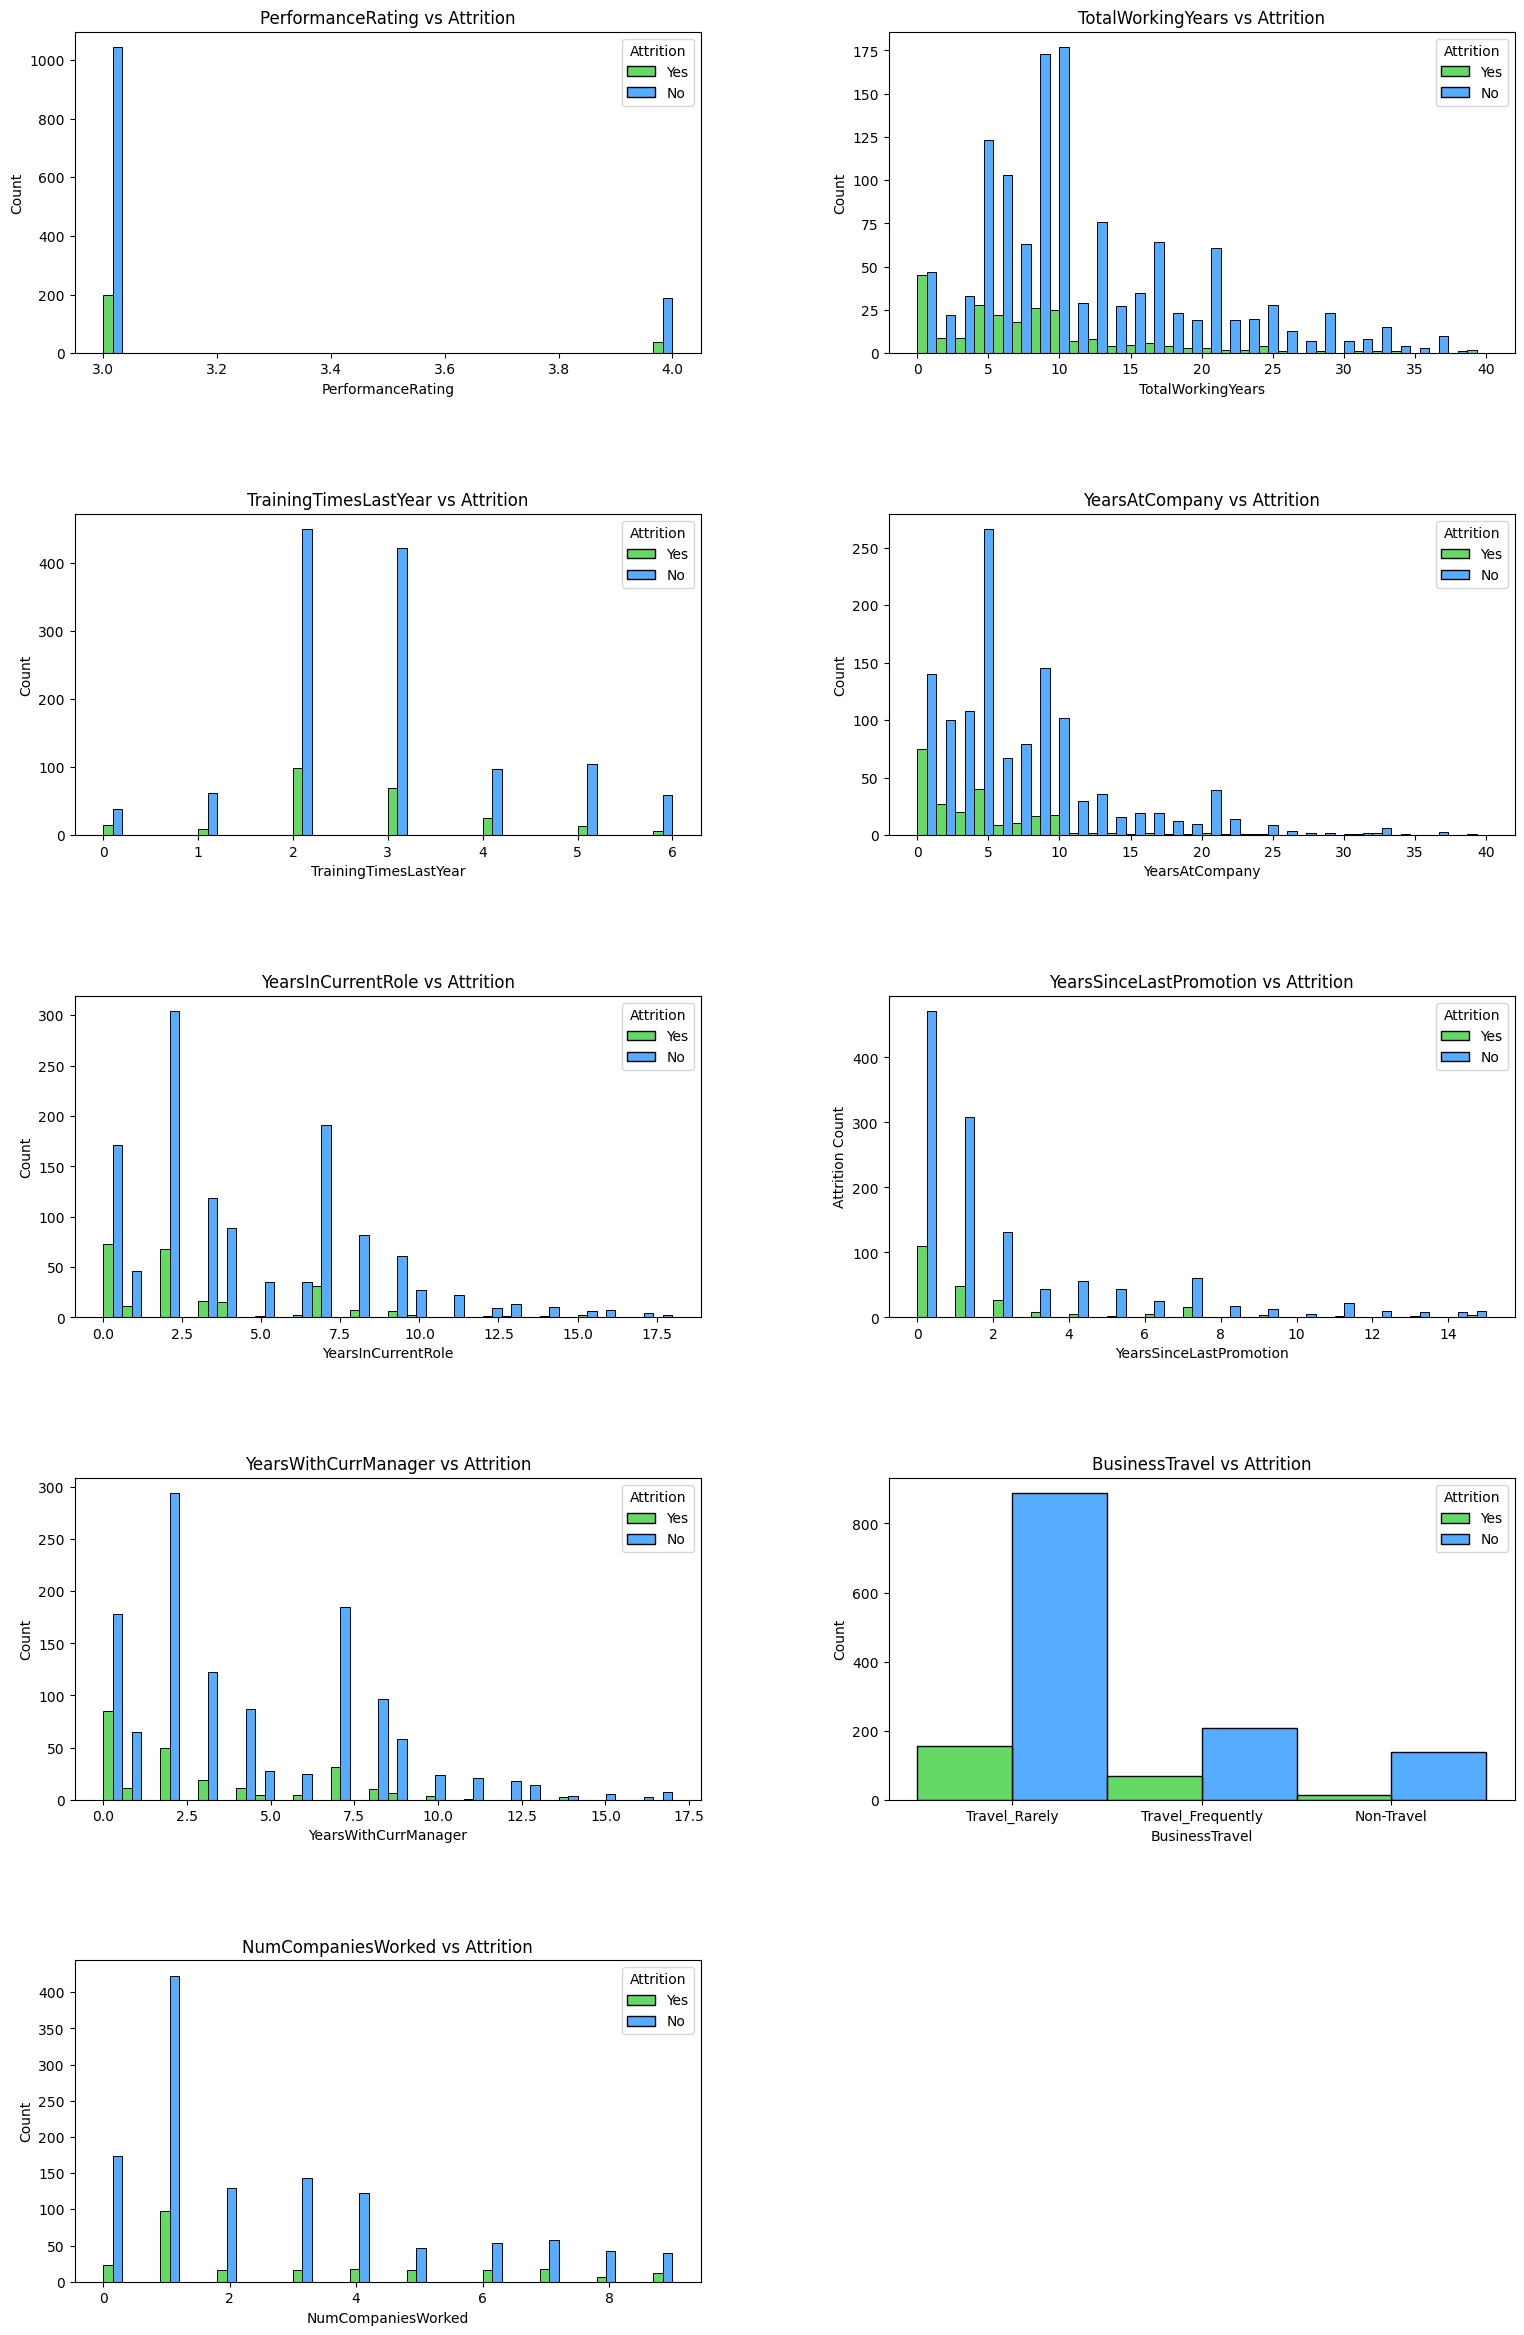

In [18]:
# List of columns to plot against 'Attrition', excluding 'JobRole'
Evaluation_indices = ['PerformanceRating', 'TotalWorkingYears', 'TrainingTimesLastYear', 'YearsAtCompany', 'YearsInCurrentRole',
                      'YearsSinceLastPromotion', 'YearsWithCurrManager', 'BusinessTravel', 'NumCompaniesWorked']

# Determine how many charts need two per row
num_regular_cols = len(Evaluation_indices)
num_rows = num_regular_cols // 2 + num_regular_cols % 2  # Rows for regular columns

# Create subplots for regular columns
fig, axes = plt.subplots(num_rows, 2, figsize=(18, 5 * num_rows))

# Flatten axes for easy iteration
axes = axes.flatten()

# Loop through each column and create the histograms
for plot_index, col in enumerate(Evaluation_indices):
    sns.histplot(data=df0, x=col, hue='Attrition', bins=30, multiple='dodge', 
                 palette={'Yes': 'limegreen', 'No': 'dodgerblue'}, edgecolor='black', ax=axes[plot_index])
    axes[plot_index].set_title(f'{col} vs Attrition', ha='center')
    axes[i].set_ylabel('Attrition Count')

    

# Remove any unused subplots if the number of regular columns is odd
if num_regular_cols % 2 != 0:
    fig.delaxes(axes[-1])

plt.tight_layout()
plt.subplots_adjust(top=0.95, bottom=0.05, left=0.1, right=0.9, hspace=0.5, wspace=0.3)
plt.show()

### BIVARIATE ANALYSIS (BOXPLOTS AND SCATTERPLOTS)

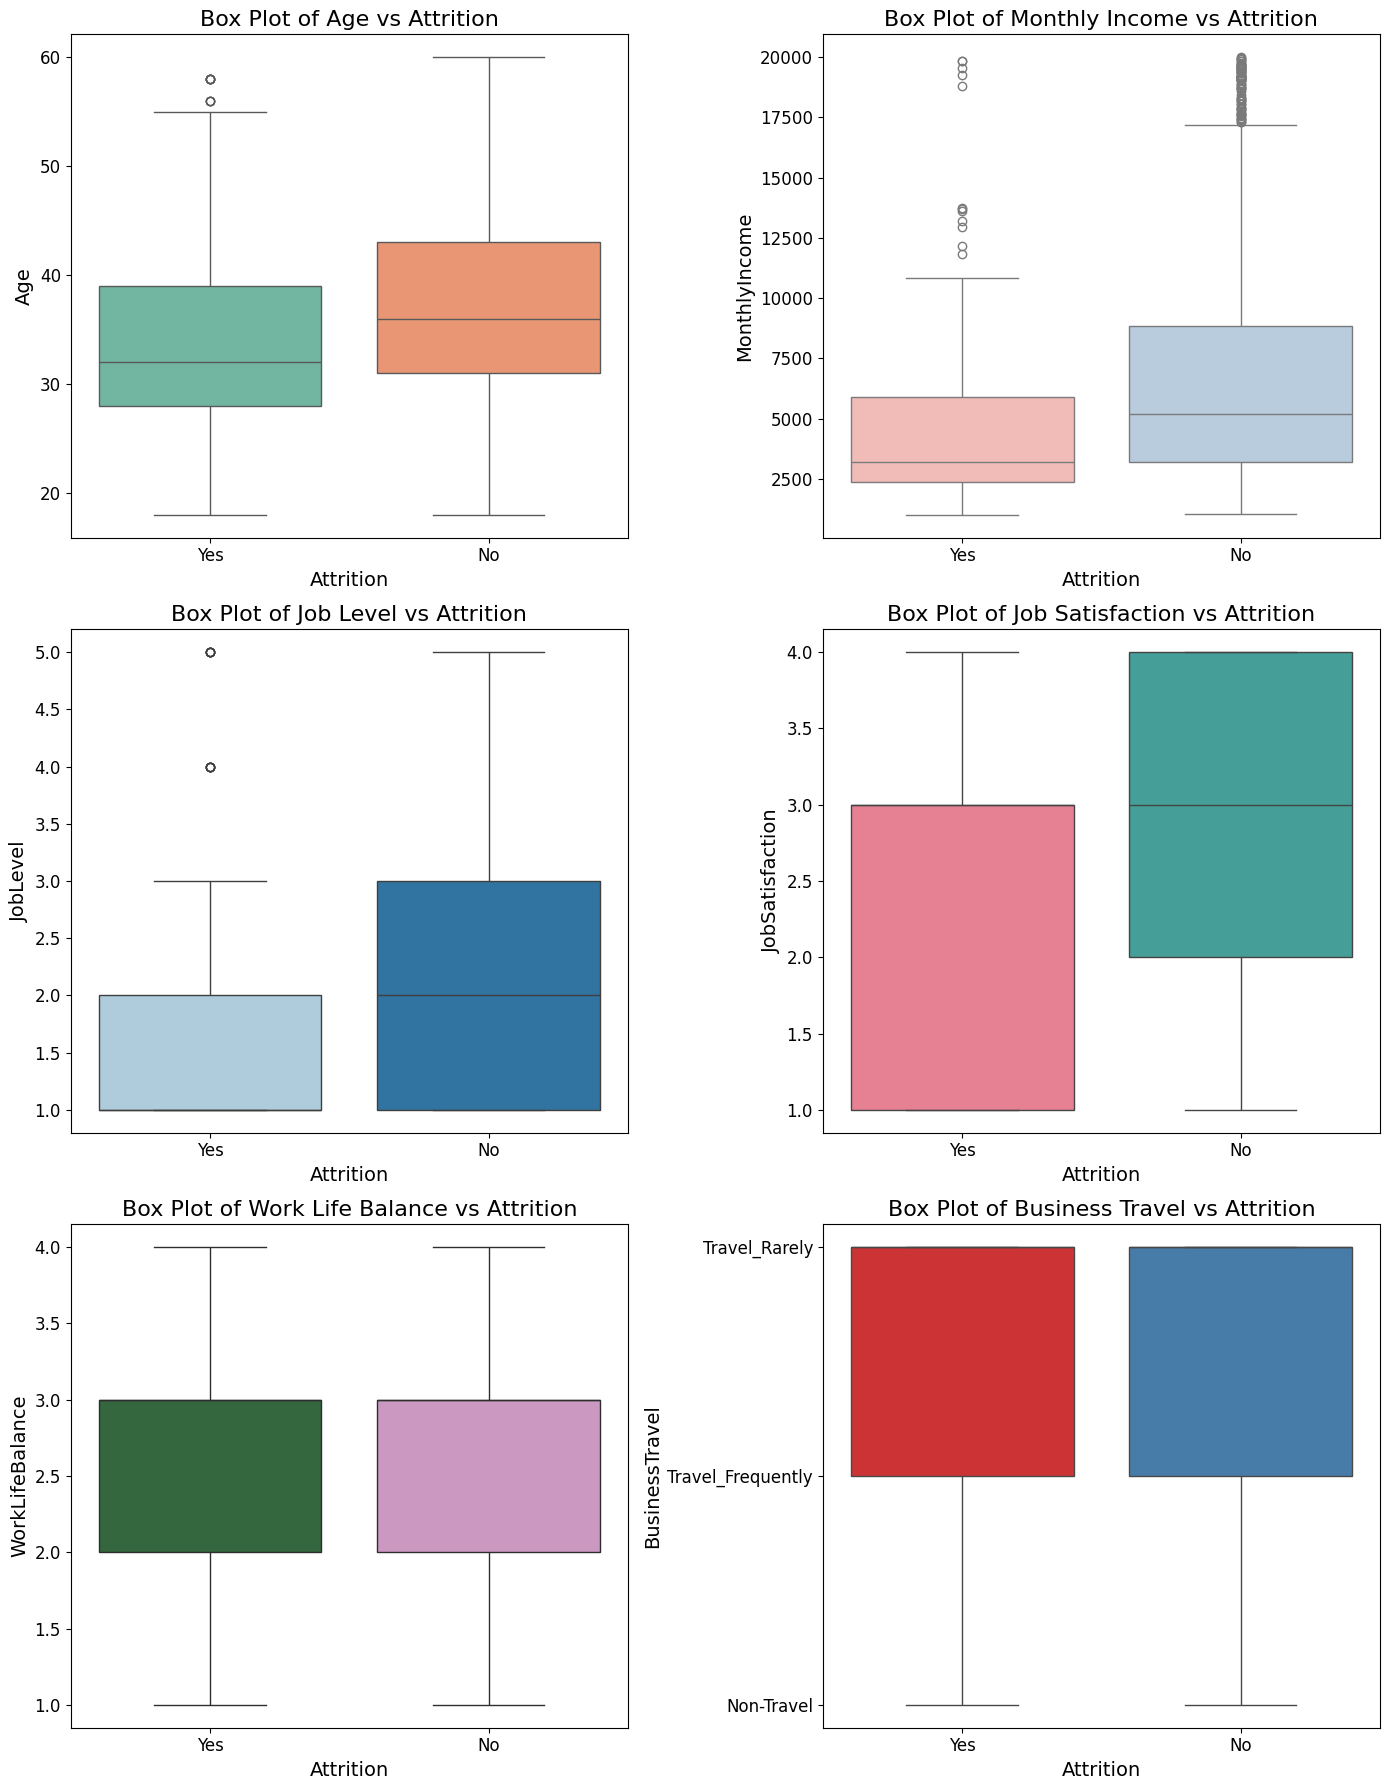

In [31]:
import matplotlib.pyplot as plt
import seaborn as sns

# Define your column names and palettes
box_cols = ['Age', 'MonthlyIncome', 'JobLevel', 'JobSatisfaction', 'WorkLifeBalance', 'BusinessTravel']
palettes = ['Set2', 'Pastel1', 'Paired', 'husl', 'cubehelix', 'Set1']

# Create subplots with 2 plots per row
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(14, 18))

# Flatten the axes array for easy iteration
axes = axes.flatten()

# Loop over each column and plot
for i, (col, palette) in enumerate(zip(box_cols, palettes)):
    if i < len(axes):
        ax = axes[i]
        
        # Determine the appropriate DataFrame and variables based on column name
        if col == 'Age':
            sns.boxplot(x='Attrition', y='Age', data=df0, hue='Attrition', palette=palette, ax=ax, legend=False)
            ax.set_title('Box Plot of Age vs Attrition', fontsize=16)
        elif col == 'MonthlyIncome':
            sns.boxplot(x='Attrition', y='MonthlyIncome', data=df0, hue='Attrition', palette=palette, ax=ax, legend=False)
            ax.set_title('Box Plot of Monthly Income vs Attrition', fontsize=16)
        elif col == 'JobLevel':
            sns.boxplot(x='Attrition', y='JobLevel', data=df0, hue='Attrition', palette=palette, ax=ax, legend=False)
            ax.set_title('Box Plot of Job Level vs Attrition', fontsize=16)
        elif col == 'JobSatisfaction':
            sns.boxplot(x='Attrition', y='JobSatisfaction', data=df0, hue='Attrition', palette=palette, ax=ax, legend=False)
            ax.set_title('Box Plot of Job Satisfaction vs Attrition', fontsize=16)
        elif col == 'WorkLifeBalance':
            sns.boxplot(x='Attrition', y='WorkLifeBalance', data=df0, hue='Attrition', palette=palette, ax=ax, legend=False)
            ax.set_title('Box Plot of Work Life Balance vs Attrition', fontsize=16)
        elif col == 'BusinessTravel':
            sns.boxplot(x='Attrition', y='BusinessTravel', data=df0, hue='Attrition', palette=palette, ax=ax, legend=False)
            ax.set_title('Box Plot of Business Travel vs Attrition', fontsize=16)

        ax.set_xlabel('Attrition', fontsize=14)
        ax.set_ylabel(col, fontsize=14)
        ax.tick_params(axis='both', which='major', labelsize=12)

# Adjust layout to prevent overlap
plt.tight_layout()
plt.show()


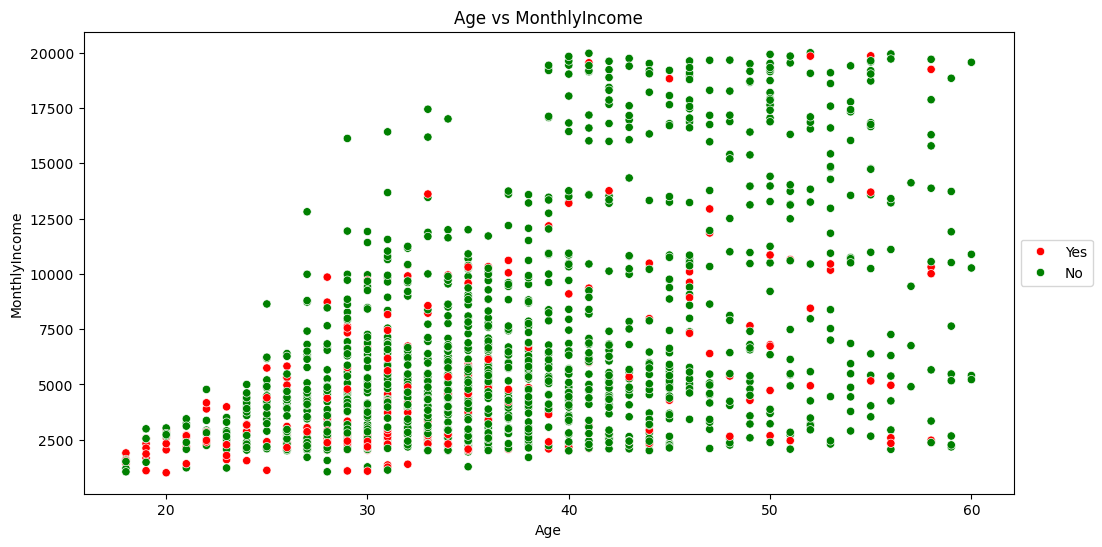

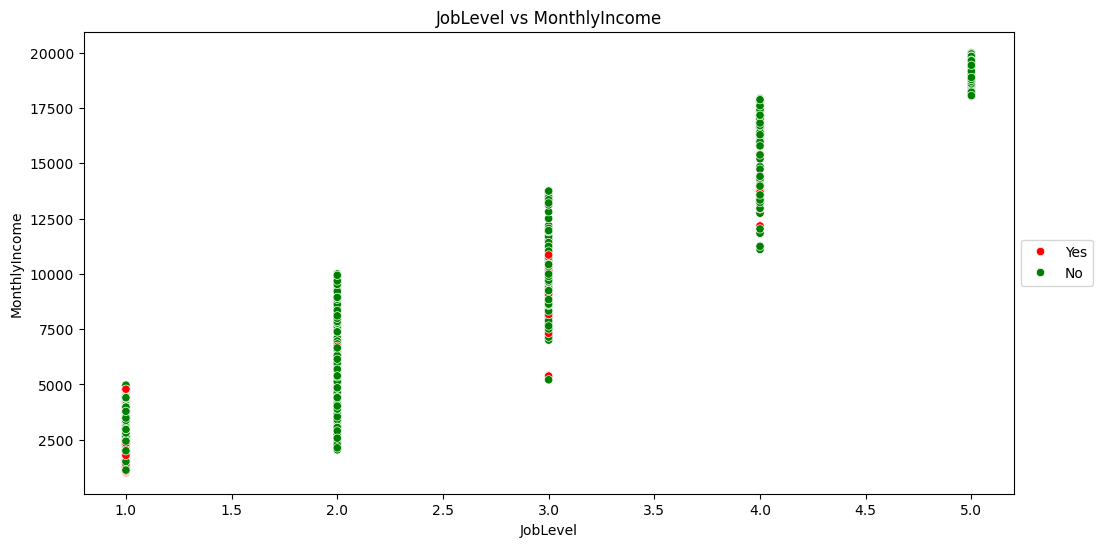

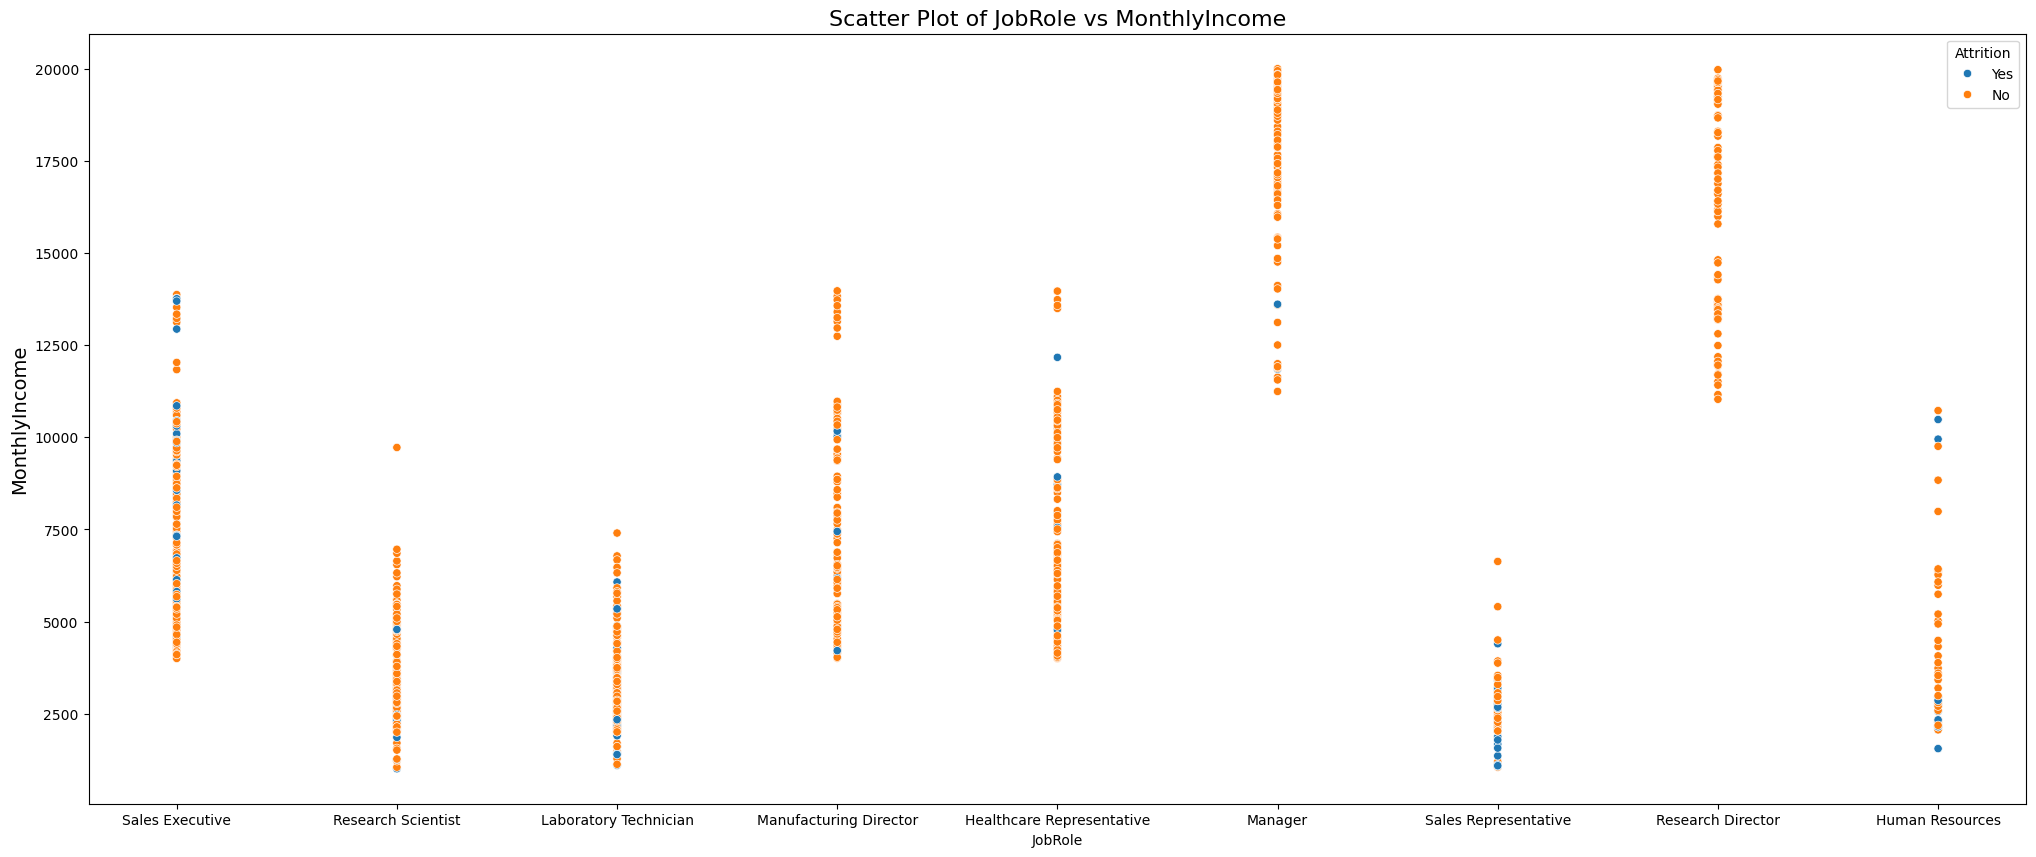

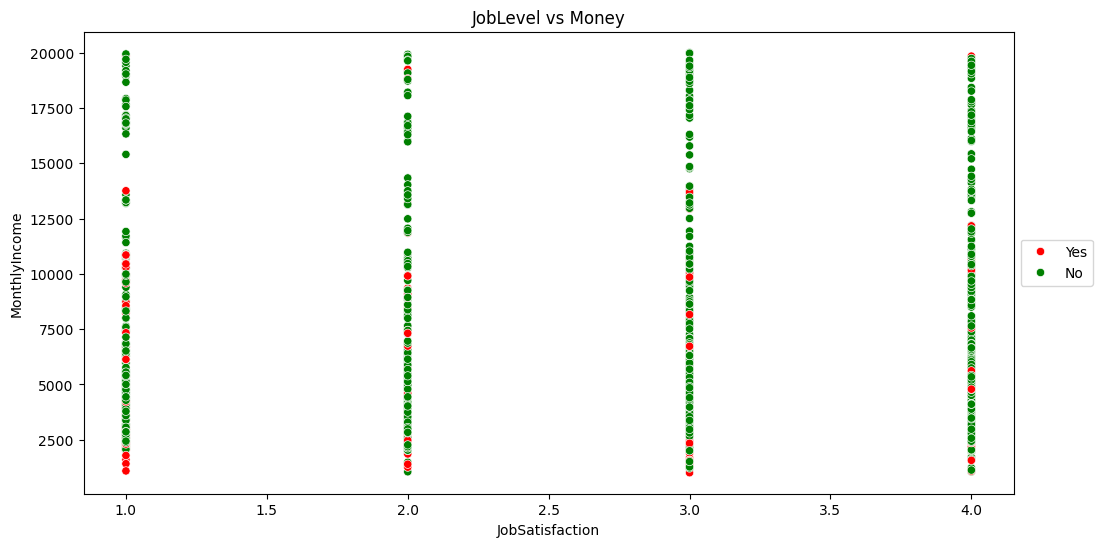

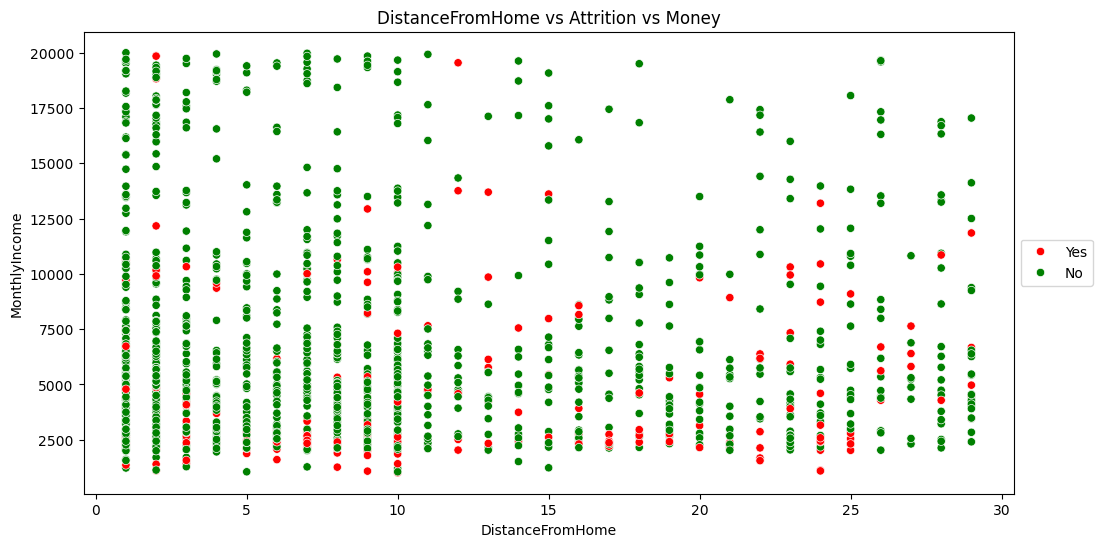

In [20]:
plt.figure(figsize=(12, 6))
sns.scatterplot(x='Age', y='MonthlyIncome', hue='Attrition', data=df0, palette=['red', 'green'])
plt.title('Age vs MonthlyIncome')
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()

plt.figure(figsize=(12, 6))
sns.scatterplot(x='JobLevel', y='MonthlyIncome', hue='Attrition', data=df0, palette=['red', 'green'])
plt.title('JobLevel vs MonthlyIncome')
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()

plt.figure(figsize=(25, 10))
sns.scatterplot(x='JobRole', y='MonthlyIncome', hue='Attrition', data=df0)

# Add labels and title
plt.title('Scatter Plot of JobRole vs MonthlyIncome', fontsize=16)
plt.xlabel('JobRole', fontsize=10)
plt.ylabel('MonthlyIncome', fontsize=14)
plt.show()

plt.figure(figsize=(12, 6))
sns.scatterplot(x='JobSatisfaction', y='MonthlyIncome', hue='Attrition', data=df0, palette=['red', 'green'])
plt.title('JobLevel vs Money')
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()

plt.figure(figsize=(12, 6))
sns.scatterplot(x='DistanceFromHome', y='MonthlyIncome', hue='Attrition', data=df0, palette=['red', 'green'])
plt.title('DistanceFromHome vs Attrition vs Money')
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()



## DROPPING IRRELEVANT COLUMNS

In [21]:
df1 = df0
drop_columns = ['EmployeeNumber', 'EmployeeCount', 'Over18', 'StandardHours']
df1 = df1.drop(drop_columns, axis=1)
df1.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,2,Female,...,3,1,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,3,Male,...,4,4,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,4,Male,...,3,2,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,4,Female,...,3,3,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,Male,...,3,4,1,6,3,3,2,2,2,2


## FEATURE CORRELATION WITH ATTRITION

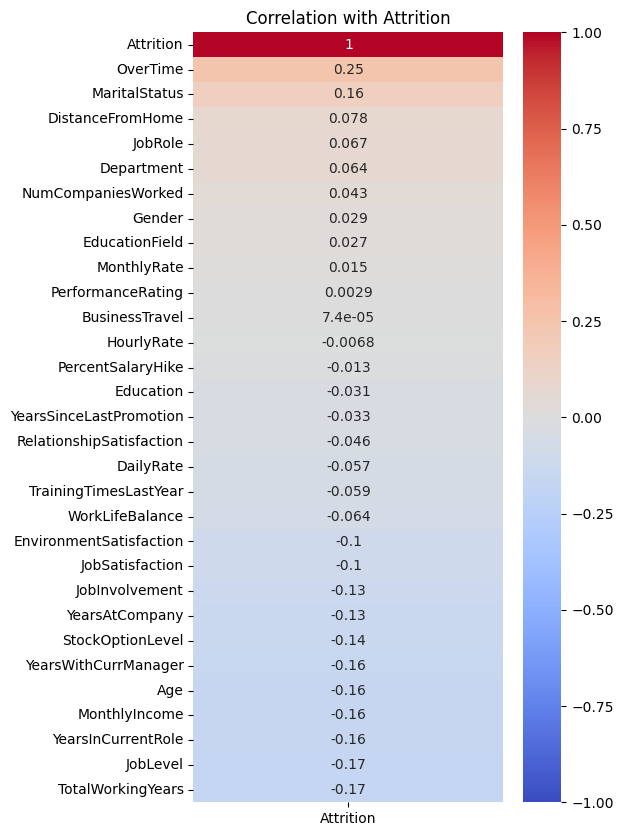

In [22]:
#Correlations of all features with Attrition
object_cols = df1.select_dtypes(include='object').columns

# Apply label encoding to each object column
for col in object_cols:
    df1[col] = df1[col].astype('category').cat.codes

correlation_matrix = df1.corr()
# Extract correlations of all features with 'Attrition'-
attrition_corr = correlation_matrix[['Attrition']].sort_values(by='Attrition', ascending=False)

# Plot the heatmap focusing on correlation with 'Attrition'-
plt.figure(figsize=(5, 10))
sns.heatmap(attrition_corr, annot=True, cmap="coolwarm", vmin=-1, vmax=1)
plt.title('Correlation with Attrition')
plt.show()

## RANKING THE FEATURES

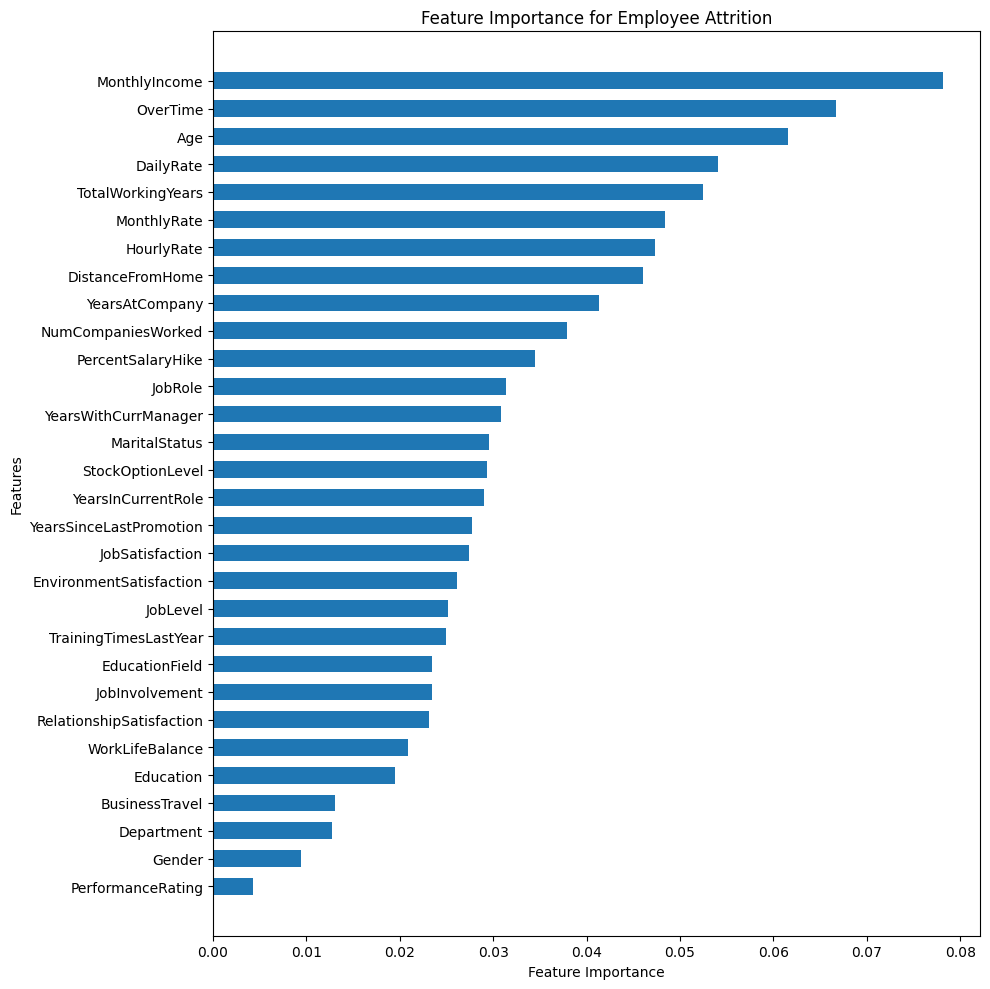

In [23]:
# Load dataset
df2 = pd.read_csv('WA_Fn-UseC_-HR-Employee-Attrition.csv')
df2 = df2.drop(drop_columns, axis=1)

# Encode categorical features
categorical_cols = df2.select_dtypes(include=['object']).columns
label_encoders = {}

for col in categorical_cols:
    label_encoders[col] = LabelEncoder()
    df2[col] = label_encoders[col].fit_transform(df2[col])

# Define features (X) and target (y)
y = df2['Attrition']
X = df2.drop('Attrition', axis=1)


# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a Random Forest model
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)

# Feature importance
feature_importances = pd.Series(rf_model.feature_importances_, index=X.columns)
feature_importances = feature_importances.sort_values(ascending=False)

# Plot horizontal bar plot for all features with spacing
plt.figure(figsize=(10, 10))
bars = plt.barh(y=feature_importances.index, width=feature_importances.values, height=0.6)
plt.title('Feature Importance for Employee Attrition', ha='center')
plt.xlabel('Feature Importance')
plt.ylabel('Features')
plt.gca().invert_yaxis()  # To have the highest importance feature at the top
plt.tight_layout()  # Adjust layout to fit everything better
plt.show()


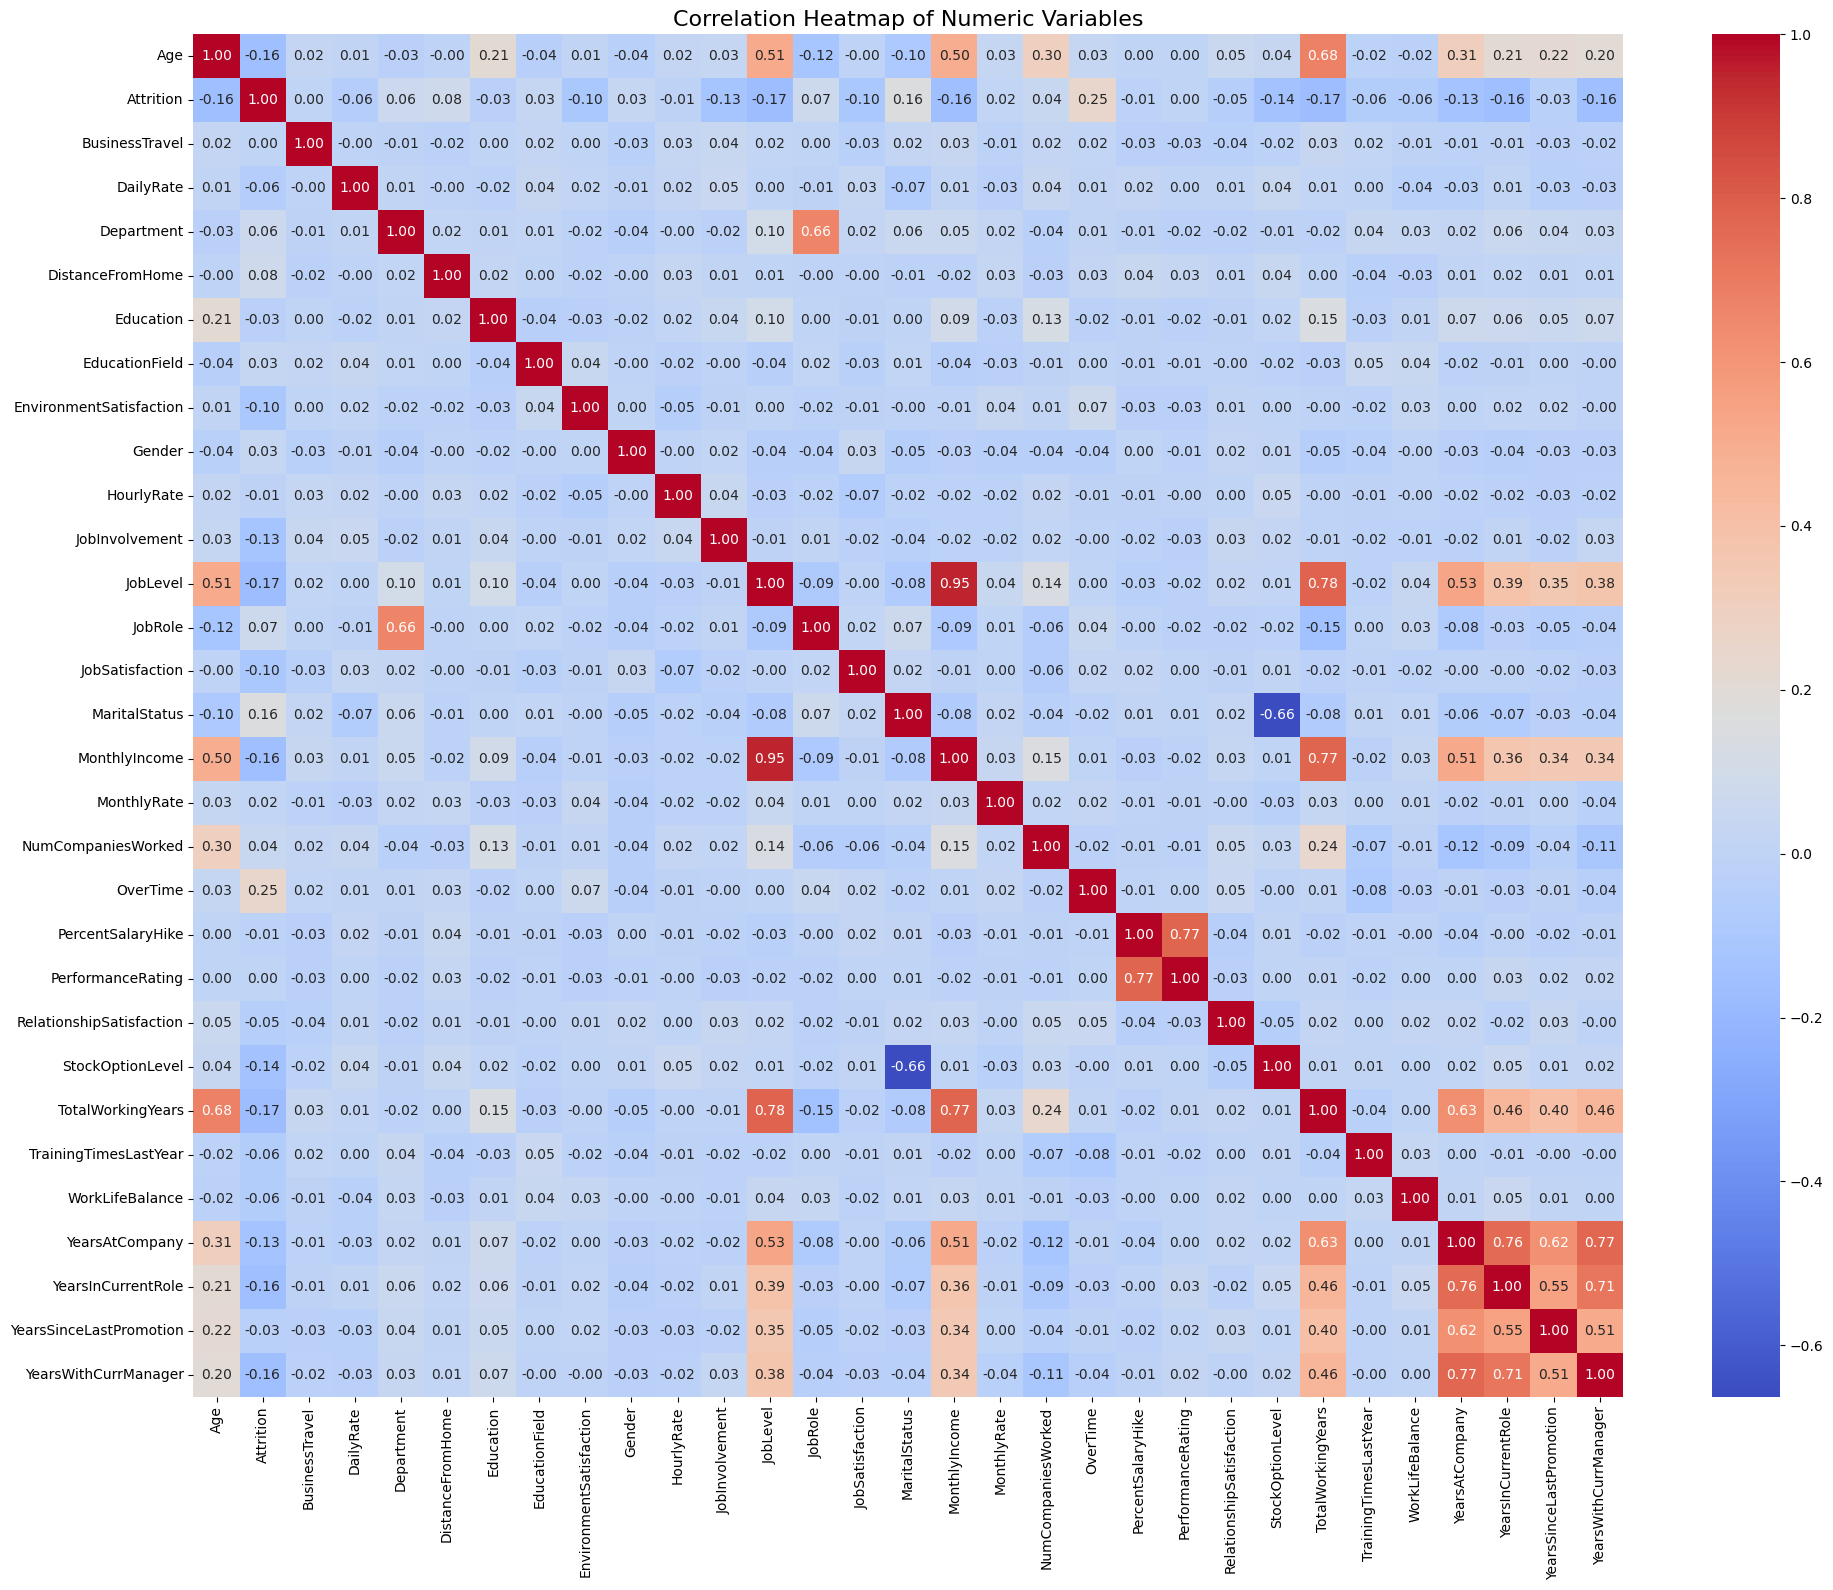

In [24]:
# Correlation Analysis-
numeric_cols = df2.select_dtypes(include=[np.number]).columns
correlation = df2[numeric_cols].corr()

plt.figure(figsize=(20, 16))
sns.heatmap(correlation, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap of Numeric Variables', fontsize=16)
plt.tight_layout()
plt.show()

In [25]:
df2.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,1,2,1102,2,1,2,1,2,0,...,3,1,0,8,0,1,6,4,0,5
1,49,0,1,279,1,8,1,1,3,1,...,4,4,1,10,3,3,10,7,1,7
2,37,1,2,1373,1,2,2,4,4,1,...,3,2,0,7,3,3,0,0,0,0
3,33,0,1,1392,1,3,4,1,4,0,...,3,3,0,8,3,3,8,7,3,0
4,27,0,2,591,1,2,1,3,1,1,...,3,4,1,6,3,3,2,2,2,2


## After ranking the features we can say that:
We have already categorized all our input labels into these 4 sections:
The most signifacnt features can be cateforized among the following according to their ranking as well :

Personal Demographic :                   3. Age, 8. Distance From Home, 18. Marital Status, 22. EducationField 

Monetary :                               1. MonthlyIncome, 4.DailyRate, 6,MonthyRate 7,HourlyRate, 
                                         11. StockOptionLevel, 13. PercentSalaryHike
                             
Overall Peronsal Job Experience :        2. OverTime, 5. TotalWorkingYears, 12. JobRole, 
                                         15. YearsInCurrentRole, `16. Job Satisfaction, 
                                         17. YearsSinceLastPromotion,
                                         19. EnvironmentSatisfaction
                                         21. JobInvolvement


Overall Performance Rating (Employees) :  9. YearsAtCompany, 10. NumberOfCompaniesWorked, 14. YearsWithCurrentManager, 17. JobLevel
                                          20. TrainingTimesLastYear

## Next task is to identify the features that are highly related to each other and eliminate the redundant features.



In [26]:
#
df3 = df2[['MonthlyIncome', 'OverTime', 'Age', 'DailyRate', 'TotalWorkingYears', 'MonthlyRate', 'HourlyRate', 'DistanceFromHome', 'YearsAtCompany', 'NumCompaniesWorked', 'Attrition']].copy()
df3.head()

,MonthlyIncome,OverTime,Age,DailyRate,TotalWorkingYears,MonthlyRate,HourlyRate,DistanceFromHome,YearsAtCompany,NumCompaniesWorked,Attrition
0,5993,1,41,1102,8,19479,94,1,6,8,1
1,5130,0,49,279,10,24907,61,8,10,1,0
2,2090,1,37,1373,7,2396,92,2,0,6,1
3,2909,1,33,1392,8,23159,56,3,8,1,0
4,3468,0,27,591,6,16632,40,2,2,9,0


## COMPLETE TILL HERE

## MODEL BUILDING 1

In [30]:
from sklearn.model_selection import train_test_split, KFold, cross_validate
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

# Step 1: Prepare the data
X = df2.drop('Attrition', axis=1)
y = df2['Attrition']

# Step 2: Split the data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 3: Initialize the Random Forest model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)

# Step 4: Set up K-Fold Cross-Validation on the training set
kf = KFold(n_splits=5, shuffle=True, random_state=42)

# Step 5: Define scoring metrics
scoring = {
    'accuracy': 'accuracy',
    'precision': 'precision',
    'recall': 'recall',
    'f1': 'f1',
    'roc_auc': 'roc_auc'
}

# Step 6: Perform cross-validation with multiple evaluation metrics on the training set
cv_results = cross_validate(rf_model, X_train, y_train, cv=kf, scoring=scoring, return_train_score=True)

# Step 7: Print evaluation metrics for each fold
print("Evaluation Metrics for Each Fold:")
for metric in scoring.keys():
    print(f"{metric.capitalize()} Scores: {cv_results[f'test_{metric}']}")
    print(f"Mean {metric.capitalize()}: {cv_results[f'test_{metric}'].mean():.4f}")
    print(f"Standard Deviation of {metric.capitalize()}: {cv_results[f'test_{metric}'].std():.4f}")
    print("-" * 50)

# Step 8: Train the model on the entire training set
rf_model.fit(X_train, y_train)

# Step 9: Make predictions on the validation set
y_val_pred = rf_model.predict(X_val)

# Step 10: Print evaluation metrics on the validation set
print("\nEvaluation on the Validation Set:")
print(f"Accuracy: {accuracy_score(y_val, y_val_pred):.4f}")
print(f"Precision: {precision_score(y_val, y_val_pred):.4f}")
print(f"Recall: {recall_score(y_val, y_val_pred):.4f}")
print(f"F1 Score: {f1_score(y_val, y_val_pred):.4f}")
print(f"ROC AUC: {roc_auc_score(y_val, rf_model.predict_proba(X_val)[:, 1]):.4f}")


Evaluation Metrics for Each Fold:
Accuracy Scores: [0.8559322  0.87234043 0.85957447 0.82553191 0.85531915]
Mean Accuracy: 0.8537
Standard Deviation of Accuracy: 0.0154
--------------------------------------------------
Precision Scores: [1.         0.66666667 0.875      0.6        0.6875    ]
Mean Precision: 0.7658
Standard Deviation of Precision: 0.1485
--------------------------------------------------
Recall Scores: [0.24444444 0.125      0.17948718 0.07142857 0.275     ]
Mean Recall: 0.1791
Standard Deviation of Recall: 0.0748
--------------------------------------------------
F1 Scores: [0.39285714 0.21052632 0.29787234 0.12765957 0.39285714]
Mean F1: 0.2844
Standard Deviation of F1: 0.1037
--------------------------------------------------
Roc_auc Scores: [0.88819081 0.74630542 0.7894427  0.79071058 0.82416667]
Mean Roc_auc: 0.8078
Standard Deviation of Roc_auc: 0.0472
--------------------------------------------------

Evaluation on the Validation Set:
Accuracy: 0.8810
Precisio

In [ ]:
RECALL AND F1S

## STRATEGIES

In [34]:
# Create targeted training programs for employees with low job satisfaction or job involvement-

low_satisfaction_employees = df0[(df0['JobSatisfaction'] < 3) | (df0['JobInvolvement'] < 3)]
print("Employees targeted for training and development programs:")
print(low_satisfaction_employees[['EmployeeNumber', 'JobSatisfaction', 'JobInvolvement', 'TrainingTimesLastYear']])

Employees targeted for training and development programs:
      EmployeeNumber  JobSatisfaction  JobInvolvement  TrainingTimesLastYear
1                  2                2               2                      3
2                  4                3               2                      3
4                  7                2               3                      3
6                 10                1               4                      3
8                 12                3               2                      2
...              ...              ...             ...                    ...
1463            2057                1               3                      2
1464            2060                3               2                      2
1466            2062                1               2                      5
1467            2064                2               4                      0
1468            2065                2               2                      3

[847 rows x 4 col

In [35]:
#'MonthlyIncome' is a top feature-

# Identify employees with below-average income and low satisfaction-
below_avg_income = df0['MonthlyIncome'] < df0['MonthlyIncome'].mean()
low_satisfaction = df0['JobSatisfaction'] < 3

# Target these employees for compensation review
compensation_review_employees = df0[below_avg_income & low_satisfaction]
print("Employees targeted for compensation adjustments:")
print(compensation_review_employees[['EmployeeNumber', 'MonthlyIncome', 'JobSatisfaction']])

Employees targeted for compensation adjustments:
      EmployeeNumber  MonthlyIncome  JobSatisfaction
1                  2           5130                2
4                  7           3468                2
6                 10           2670                1
10                14           2426                2
16                21           3298                2
...              ...            ...              ...
1449            2038           2439                1
1459            2053           4025                2
1460            2054           3785                1
1467            2064           6142                2
1468            2065           5390                2

[374 rows x 3 columns]


In [40]:
from sklearn.metrics import accuracy_score

# Monitor changes in attrition rates or performance ratings after implementing strategies
y_pred = rf_model.predict(X_test)
current_accuracy = accuracy_score(y_test, y_pred)

print(f"Current model accuracy after implementing strategies: {current_accuracy}")

# Example: Monitor specific KPIs
kpi_monitoring = df1.groupby('JobLevel').agg({
    'Attrition': 'mean',
    'MonthlyIncome': 'mean',
    'JobSatisfaction': 'mean'
})

print("KPI Monitoring after strategy implementation:")
print(kpi_monitoring)

Current model accuracy after implementing strategies: 0.8809523809523809
KPI Monitoring after strategy implementation:
          Attrition  MonthlyIncome  JobSatisfaction
JobLevel                                           
1          0.263352    2786.915285         2.718232
2          0.097378    5502.277154         2.758427
3          0.146789    9817.252294         2.678899
4          0.047170   15503.783019         2.726415
5          0.072464   19191.826087         2.739130
